# **Simple Multi Layer Perceptron with keras**
What it does?

*   Creating a MLP using a sequential model with dense layers.
*   Comparing many models with different activation functions, optimizers, loss funcstions etc.
*   Presenting some evaluation scores in the chosen model.
*   Analyzing some terms (Theoretical background).


In [1]:
# Importing needed libraries
from keras.utils import np_utils
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd

from sklearn.metrics import confusion_matrix

### Data Preprocessing Level

[The mnist dataset](https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz) by google api.

In [2]:
# Load MNIST digit dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


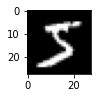

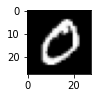

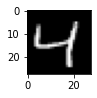

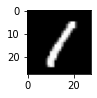

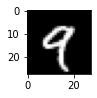

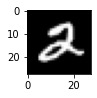

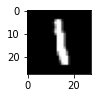

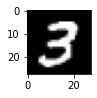

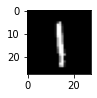

In [3]:
# Plot a sample of the training data

# Dimensions of data
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

for i in range(9):  
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  plt.show()

#### Handling the data to fit the model

**“Normalizing”** a vector most often means dividing by a norm of the vector. It also often refers to rescaling by the minimum and range of the vector, to make all the elements lie between 0 and 1 thus bringing all the values of numeric columns in the dataset to a common scale.

The goal of **normalization** is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

**One hot encoding** is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [4]:
# Reshaping input size
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

# Normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

# Labeling (one hot encoding)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## Creating the model

In [5]:
import keras
import time

# Class to help us retrieve the training times of the models
class TimeHistory(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.times = []

  def on_epoch_begin(self, batch, logs={}):
    self.epoch_time_start = time.time()

  def on_epoch_end(self, batch, logs={}):
    self.times.append(time.time() - self.epoch_time_start)

#### Number of Layers Comparison

**[Sequential](https://keras.io/guides/sequential_model/)** model is a linear stack of layers.You can create a **Sequential** model by passing a list of layer instances to the constructor.

**[Dense layer](https://keras.io/api/layers/core_layers/dense/)**

Just your regular densely-connected NN layer.

**Dense** implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

[**Model training APIs**](https://keras.io/api/models/model_training_apis/)

**compile method**: Configures the model for training.

**fit method**: Trains the model for a fixed number of epochs (iterations on a dataset).

**evaluate method**: Returns the loss value & metrics values for the model in test mode.

In [6]:
# Adding Layers
model = Sequential()
model.add(Dense(64, input_dim=(784), activation='sigmoid'))
model.add(Dense(10, activation='sigmoid')) #output the probability

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.07211215049028397
Test accuracy:  0.6043999791145325
Training time (seconds):  45.60478210449219


In [7]:
# Adding Layers
model = Sequential()
model.add(Dense(128, input_dim=(784), activation='sigmoid'))
model.add(Dense(10, activation='sigmoid')) #output the probability

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.0688987523317337
Test accuracy:  0.6389999985694885
Training time (seconds):  58.24821591377258


In [8]:
# Adding Layers
model = Sequential()
model.add(Dense(128, input_dim=(784), activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid')) #output the probability

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.0890921875834465
Test accuracy:  0.19939999282360077
Training time (seconds):  62.73317885398865


In [9]:
# Adding Layers
model = Sequential()
model.add(Dense(128, input_dim=(784), activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid')) #output the probability

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.08913359045982361
Test accuracy:  0.17149999737739563
Training time (seconds):  66.0434627532959


In [10]:
# Adding Layers
model = Sequential()
model.add(Dense(64, input_dim=(784), activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid')) #output the probability

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.08991013467311859
Test accuracy:  0.11349999904632568
Training time (seconds):  48.45081186294556


##### Note
We noticed that creating a more complex network doesn't give us better results. So let's try changing the activation functions.

#### Activation Functions Comparison

##### Plotting [Sigmoid](https://keras.io/api/layers/activations/#sigmoid-function), [ReLU](https://keras.io/api/layers/activations/#relu-function), [Sotfmax](https://keras.io/api/layers/activations/#softmax-function)

In [11]:
x = np.arange(-5, 5, 0.01)

# Function to plot the activation functions
def plot(func, yaxis=(-1.4, 1.4)):
    plt.ylim(yaxis)
    plt.locator_params(nbins=5)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.axhline(lw=1, c='black')
    plt.axvline(lw=1, c='black')
    plt.grid(alpha=0.4, ls='-.')
    plt.box(on=None)
    plt.plot(x, func(x), c='r', lw=3)

Sigmoid activation function, sigmoid(x) = 1 / (1 + exp(-x)).

Applies the sigmoid activation function. For small values (<-5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.

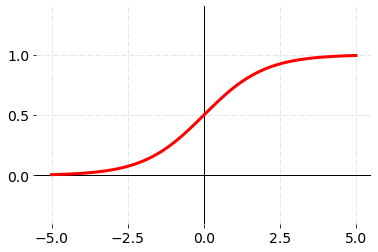

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plot(sigmoid, yaxis=(-0.4, 1.4))

Applies the rectified linear unit activation function.

With default values, this returns the standard ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor.

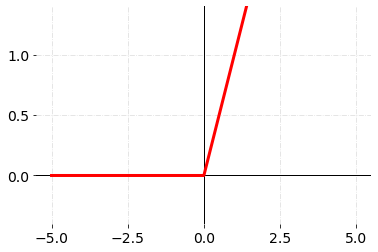

In [13]:
relu = np.vectorize(lambda x: x if x > 0 else 0, otypes=[np.float])

plot(relu, yaxis=(-0.4, 1.4))

Softmax converts a real vector to a vector of categorical probabilities.

The elements of the output vector are in range (0, 1) and sum to 1.

Each vector is handled independently.

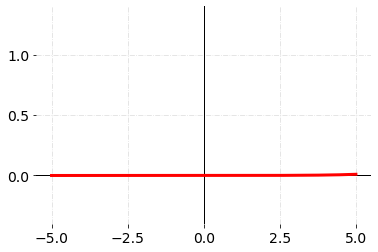

In [14]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

plot(softmax, yaxis=(-0.4, 1.4))

##### Activation Functions

In [15]:
# Adding Layers
model = Sequential()
model.add(Dense(64, input_dim=(784), activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='softmax')) #output the probability

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    #keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.08930366486310959
Test accuracy:  0.14000000059604645
Training time (seconds):  46.548964738845825


In [16]:
# Adding Layers
model = Sequential()
model.add(Dense(64, input_dim=(784), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #output the probability

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.018642408773303032
Test accuracy:  0.8851000070571899
Training time (seconds):  46.72444128990173


###### Note
We notice that the network using the ReLU activation function has better results.

#### [Kernel Initializer Comparison](https://keras.io/api/layers/initializers/)
kernel_initializer: Initializer for the kernel weights matrix.

Normal vs Uniform Distributions:
Normal Distribution is a probability distribution where probability of x is highest at centre and lowest in the ends whereas in Uniform Distribution probability of x is constant.

In [17]:
# Adding Layers
from keras.initializers import RandomNormal

initializer = RandomNormal(mean=0.0, stddev=0.05, seed=None)

model = Sequential()
model.add(Dense(64, input_shape=(784,), activation='relu', kernel_initializer=initializer))
model.add(Dense(64, activation='relu', kernel_initializer=initializer))
model.add(Dense(10, activation='softmax', kernel_initializer=initializer)) #output the probability

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.08661755174398422
Test accuracy:  0.35519999265670776
Training time (seconds):  47.05502676963806


In [18]:
# Adding Layers
from keras.initializers import GlorotNormal

initializer = GlorotNormal(seed=None)

model = Sequential()
model.add(Dense(64, input_shape=(784,), activation='relu', kernel_initializer=initializer))
model.add(Dense(64, activation='relu', kernel_initializer=initializer))
model.add(Dense(10, activation='softmax', kernel_initializer=initializer)) #output the probability

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.019999008625745773
Test accuracy:  0.8813999891281128
Training time (seconds):  48.35572338104248


In [19]:
# Adding Layers

# Glorot Uniform distribution is the default value
model = Sequential()
model.add(Dense(64, input_dim=(784), activation='relu', kernel_initializer="glorot_uniform"))
model.add(Dense(64, activation='relu', kernel_initializer="glorot_uniform"))
model.add(Dense(10, activation='softmax', kernel_initializer="glorot_uniform")) #output the probability

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.019037753343582153
Test accuracy:  0.8885999917984009
Training time (seconds):  46.80585789680481


In [20]:
# Adding Layers
model = Sequential()
model.add(Dense(64, input_dim=(784), activation='relu', kernel_initializer="random_uniform"))
model.add(Dense(64, activation='relu', kernel_initializer="glorot_uniform"))
model.add(Dense(10, activation='softmax', kernel_initializer="glorot_uniform")) #output the probability

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.018437262624502182
Test accuracy:  0.8901000022888184
Training time (seconds):  47.293946981430054


##### Note 
Best results comes up by using the default kernel_initializer (Glorot Uniform) but also using for only the first layer the random_uniform and the other two the default one.

#### [Optimizer Comparison](https://keras.io/api/optimizers/)
Optimizers are algorithms or methods used to change the attributes of your neural network. 

An optimizer is one of the two arguments required for compiling a Keras model

[SGD](https://keras.io/api/optimizers/sgd/)

Gradient Descent (with momentum) optimizer.

In [21]:
# Adding Layers
model = Sequential()
model.add(Dense(64, input_dim=(784), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #output the probability

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.021392758935689926
Test accuracy:  0.8752999901771545
Training time (seconds):  46.70272898674011


[RMSprop](https://keras.io/api/optimizers/rmsprop/)

Optimizer that implements the RMSprop algorithm.

The gist of RMSprop is to:

Maintain a moving (discounted) average of the square of gradients
Divide the gradient by the root of this average
This implementation of RMSprop uses plain momentum, not Nesterov momentum.

The centered version additionally maintains a moving average of the gradients, and uses that average to estimate the variance.

In [22]:
# Adding Layers
model = Sequential()
model.add(Dense(64, input_dim=(784), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #output the probability

model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.003893623361364007
Test accuracy:  0.9757000207901001
Training time (seconds):  16.171084880828857


[Adam](https://keras.io/api/optimizers/adam/)

Optimizer that implements the Adam algorithm.

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

In [23]:
# Adding Layers
model = Sequential()
model.add(Dense(64, input_dim=(784), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #output the probability

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.004217017907649279
Test accuracy:  0.9729999899864197
Training time (seconds):  20.350200176239014


[Adamax](https://keras.io/api/optimizers/adamax/)

Optimizer that implements the Adamax algorithm.

It is a variant of Adam based on the infinity norm. Default parameters follow those provided in the paper. Adamax is sometimes superior to adam, specially in models with embeddings.

In [24]:
# Adding Layers
model = Sequential()
model.add(Dense(64, input_dim=(784), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #output the probability

# Adamax
model.compile(optimizer='adamax', loss='mean_squared_error', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.0038834449369460344
Test accuracy:  0.9749000072479248
Training time (seconds):  45.75886559486389


[NAdam](https://keras.io/api/optimizers/Nadam/)

Optimizer that implements the NAdam algorithm.

Much like Adam is essentially RMSprop with momentum, Nadam is Adam with Nesterov momentum.

In [25]:
# Adding Layers
model = Sequential()
model.add(Dense(64, input_dim=(784), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #output the probability

# Nadam
model.compile(optimizer='nadam', loss='mean_squared_error', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.004141924437135458
Test accuracy:  0.973800003528595
Training time (seconds):  18.951260805130005


#### [Loss Comparison](https://keras.io/api/losses/)
The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.

[Poisson](https://keras.io/api/losses/probabilistic_losses/#poisson-function)

Computes the Poisson loss between y_true and y_pred.

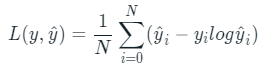

In [26]:
# Adding Layers
model = Sequential()
model.add(Dense(64, input_dim=(784), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #output the probability

# Adam
model.compile(optimizer='rmsprop', loss='poisson', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.10912120342254639
Test accuracy:  0.9751999974250793
Training time (seconds):  11.049522638320923


[Mean Squared Error](https://keras.io/api/losses/regression_losses/#mean_squared_error-function)

Computes the mean of squares of errors between labels and predictions.

loss = square(y_true - y_pred)

In [27]:
# Adding Layers
model = Sequential()
model.add(Dense(64, input_dim=(784), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #output the probability

# Adam
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.004193246364593506
Test accuracy:  0.9733999967575073
Training time (seconds):  12.04507827758789


[Mean Absolute Error](https://keras.io/api/losses/regression_losses/#mean_absolute_error-function)

Computes the mean of absolute difference between labels and predictions.

loss = abs(y_true - y_pred)

In [28]:
# Adding Layers
model = Sequential()
model.add(Dense(64, input_dim=(784), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #output the probability

# Adam
model.compile(optimizer='rmsprop', loss='mean_absolute_error', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.006740806624293327
Test accuracy:  0.9678000211715698
Training time (seconds):  15.855898380279541


[Categorical Crossentropy](https://keras.io/api/losses/probabilistic_losses/#categorical_crossentropy-function)

Computes the categorical crossentropy loss.

Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a one_hot representation.

In [29]:
# Adding Layers
model = Sequential()
model.add(Dense(64, input_dim=(784), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #output the probability

# Adam
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.09058729559183121
Test accuracy:  0.9763000011444092
Training time (seconds):  12.953055143356323


In [30]:
# Adding Layers
model = Sequential()
model.add(Dense(64, input_dim=(784), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #output the probability

# Adam
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.09367303550243378
Test accuracy:  0.9754999876022339
Training time (seconds):  15.252958059310913


#### Batch Size Influence

[Traid-off between batch size and number of iterations for training.](https://stats.stackexchange.com/questions/164876/what-is-the-trade-off-between-batch-size-and-number-of-iterations-to-train-a-neu)

In [31]:
# Adding Layers
model = Sequential()
model.add(Dense(64, input_dim=(784), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #output the probability

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=512 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.0043238019570708275
Test accuracy:  0.9717000126838684
Training time (seconds):  13.305387496948242


In [32]:
# Adding Layers
model = Sequential()
model.add(Dense(64, input_dim=(784), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #output the probability

model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=512 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.0051661888137459755
Test accuracy:  0.9657999873161316
Training time (seconds):  8.520832061767578


In [33]:
# Adding Layers
model = Sequential()
model.add(Dense(64, input_dim=(784), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #output the probability

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=512 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.09204675257205963
Test accuracy:  0.9718000292778015
Training time (seconds):  11.222652912139893


In [34]:
# Adding Layers
model = Sequential()
model.add(Dense(64, input_dim=(784), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #output the probability

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

time_callback = TimeHistory()
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    time_callback 
    ]

model.fit(x_train, y_train, epochs=50, batch_size=512 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.10145923495292664
Test accuracy:  0.9708999991416931
Training time (seconds):  9.808069229125977


### Optimized Model

In [35]:
# Adding Layers
model = Sequential()
model.add(Dense(64, input_dim=(784), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #output the probability

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

time_callback = TimeHistory() # callback to get the times for each epoch
my_callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3), # Trying to avoid overfitting
    time_callback 
    ]

history = model.fit(x_train, y_train, epochs=50, batch_size=256 ,validation_data=(x_test,y_test), shuffle=True, verbose=0, callbacks=my_callbacks)
times = time_callback.times # list of all the training times for each epoch

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Training time (seconds): ', sum(times))

Test loss:  0.004337915685027838
Test accuracy:  0.97079998254776
Training time (seconds):  10.845935583114624


Predicted Label:  6
True Label:  5
Predicted Label:  4
True Label:  7
Predicted Label:  9
True Label:  2
Predicted Label:  2
True Label:  4
Predicted Label:  0
True Label:  6


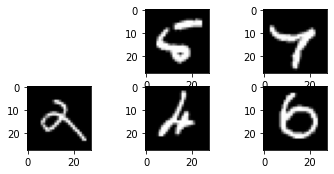

In [36]:
(_, _), (X, Y) = mnist.load_data() # getting the test data with original size

wrong_predictions_indices = [] # list for the indices with wrong predicted label

predictions = model.predict(x_test) # get the predictions

for i in range(len(y_test)-9700): # iterate through the first 200 samples
  if np.argmax(predictions[i]) != np.argmax(y_test[i]): # check it predicted label is different from true label 
    wrong_predictions_indices.append(i) # append the indices of the wrongly predicted samples

# Show the results (errors)
temp = 1
for i in wrong_predictions_indices: 
  print("Predicted Label: ", np.argmax(predictions[i]))
  print("True Label: ", np.argmax(y_test[i]))
  plt.subplot(330 + 1 + temp)
  plt.imshow(X[i], cmap=plt.get_cmap('gray'))
  temp = temp + 1
plt.show()

## Evaluating the model

#### Plotting the model

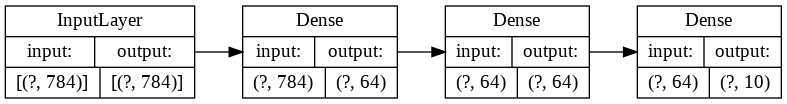

In [37]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='LR')

In [38]:
print(model.summary())

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_75 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_76 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None


#### Plotting Accuracy and Loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


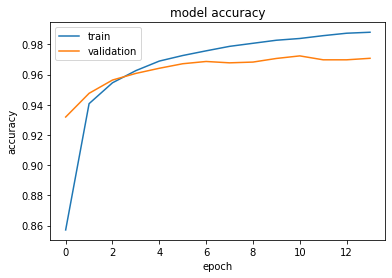

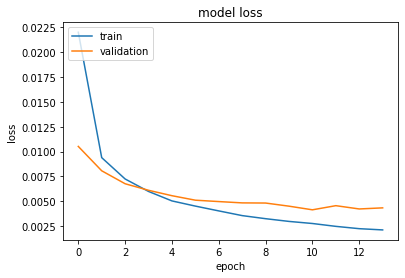

In [39]:
print(history.history.keys())

#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Consfusion Matrix

In [40]:
y_pred=model.predict(x_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
display(matrix)

array([[ 969,    0,    2,    0,    0,    0,    5,    1,    3,    0],
       [   0, 1120,    4,    3,    0,    1,    3,    1,    3,    0],
       [   5,    1, 1005,    6,    0,    0,    4,    4,    6,    1],
       [   0,    0,    4,  992,    0,    1,    0,    3,    5,    5],
       [   1,    0,    7,    1,  960,    0,    3,    0,    2,    8],
       [   4,    0,    0,   22,    2,  838,   11,    1,    8,    6],
       [   2,    1,    2,    1,    2,    4,  942,    1,    3,    0],
       [   0,    8,   19,   11,    3,    1,    0,  965,    3,   18],
       [   6,    0,    4,    7,    5,    4,    3,    2,  939,    4],
       [   4,    3,    0,    7,    7,    1,    0,    5,    4,  978]])

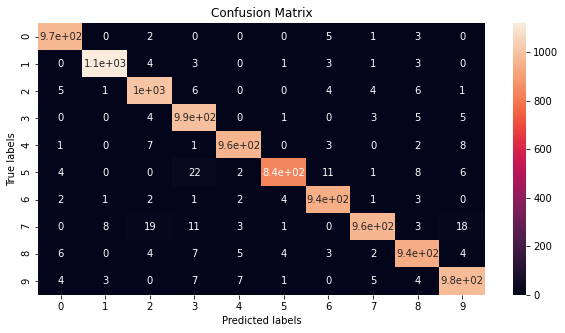

In [41]:
plt.rcParams["figure.figsize"] = (10,5) # in order to increase the size of the plots

ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1','2', '3', '4', '5', '6', '7', '8', '9']); ax.yaxis.set_ticklabels(['0', '1','2', '3', '4', '5', '6', '7', '8', '9']);

## Sources

https://keras.io/

https://mlfromscratch.com/activation-functions-explained/#/

https://gist.github.com/nad2000/6100df204946da558212203ce401dffa
https://www.kaggle.com/siebenrock/activation-functions

https://stackoverflow.com/questions/43178668/record-the-computation-time-for-each-epoch-in-keras-during-model-fit

https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f
